# Assignment (Fake News Prediction)

## Load The Dataset

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.svm import LinearSVC

In [2]:
# Load datasets for fake and true 
import pandas as pd
fakeData = pd.read_csv('Data/Fake.csv')
trueData = pd.read_csv('Data/True.csv')

In [3]:
# observe the first 5 rows of true News
fakeData.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
#information about fields
fakeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
fakeData['text'][1]

'House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys  don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but team Tr

In [6]:
# Observe the first 5 rows of True news
trueData.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
trueData['text'][2]

'WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.”  The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loomed over the White House since Trump took office in January. It

In [8]:
# create target variable for both data frames
# if news article is fake it will be denoted as 0
fakeData['class'] = 0
# if news article is true it will be denoted as 1
trueData['class'] = 1

In [10]:
fakeData.head(5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
trueData.head(5)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
# shape of both data frames
fakeData.shape, trueData.shape

((23481, 5), (21417, 5))

Purpose for put last 10 row (fake and true into data frame)
- Manual Testing for Both the Dataset
- What is Manual Testing
- -> The process of manually checking software for faults is known as manual testing. It requires a tester to act like an end user, using the majority of the application's capabilities to ensure proper behavior.

In [14]:
# putting last 10 rows of fake news into a data frame
fakeData_manual_testing = fakeData.tail(10)

# dropping the last 10 rows of fake news from original fake news df
for i in range(23480, 23470, -1):
    fakeData.drop([i], axis = 0, inplace = True)

# putting last 10 rows of true news into a data frame
trueData_manual_testing = trueData.tail(10)

# dropping the last 10 rows of true news from original true news df
for i in range(21416, 21406, -1):
    trueData.drop([i], axis = 0, inplace = True)

In [15]:
# check both data frames dimensions after dropping the last 10 rows
fakeData.shape, trueData.shape

((23471, 5), (21407, 5))

In [25]:
# looking at the 10 fake news observations that placed in a data frame
fakeData_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [30]:
# look at the 10 observations of true news that placed in a dataframe
trueData_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [32]:
# combine the 2 data frames containing both fake and true news 
# combing the two frames on the rows axis
mergeData = pd.concat([fakeData,trueData], axis = 0)
mergeData.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [34]:
# checking the columns of the combined data frames
mergeData.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [36]:
# dropping the columns title, subject, date and putting into a new data frame
# only keeping the text and class
script = mergeData.drop(['title','subject','date'], axis = 1)

In [38]:
# check for missing values
script.isna().sum()

text     0
class    0
dtype: int64

In [40]:
# shuffle our data frame
script = script.sample(frac = 1)
script.head()

,text,class
1928,His accusation that President Obama wiretapped...,0
20964,It won t be long before the Muslims outnumber ...,0
11503,GAZA (Reuters) - Israeli troops shot dead at l...,1
9798,"After being shot 3 months ago (see below), Maj...",0
17262,Like moths to a lamp bam!The terror suspect wh...,0


In [42]:
# reset the index
script.reset_index(inplace = True)

# drop the old index
script.drop(['index'], axis = 1, inplace = True)

In [44]:
#recall again column
script.columns

Index(['text', 'class'], dtype='object')

In [46]:
script.head()

,text,class
0,His accusation that President Obama wiretapped...,0
1,It won t be long before the Muslims outnumber ...,0
2,GAZA (Reuters) - Israeli troops shot dead at l...,1
3,"After being shot 3 months ago (see below), Maj...",0
4,Like moths to a lamp bam!The terror suspect wh...,0


In [48]:
# first observation text
script['text'][1]

'It won t be long before the Muslims outnumber the Germans. That s when the real fireworks are going to start flying Dramatic footage shows a refugee woman spitting at a horde of anti-migrant protesters who swarmed around their bus in the tiny German village where they are to be housed.German police, who came under fire for violently removing refugees from the bus, have pointed to the video as proof that the new arrivals provoked the already frenzied mob.The 20 refugees on the bus were the first to be homed in Clausnitz, home to just 800 people, where an asylum home has been set up for them.The German government condemned the  cold hearted and cowardly  mob that tried to stop them from taking shelter in the asylum centre, calling the episode  deeply shameful .Now police and eyewitnesses have claimed the asylum seekers deliberately enraged the mob as they alighted to their new home. The refugees are said to have made cut throat gestures by drawing their fingers across their own throats 

In [50]:
script.shape

(44878, 2)

In [52]:
#number of real and fake news
script['class'].value_counts()

class
0    23471
1    21407
Name: count, dtype: int64

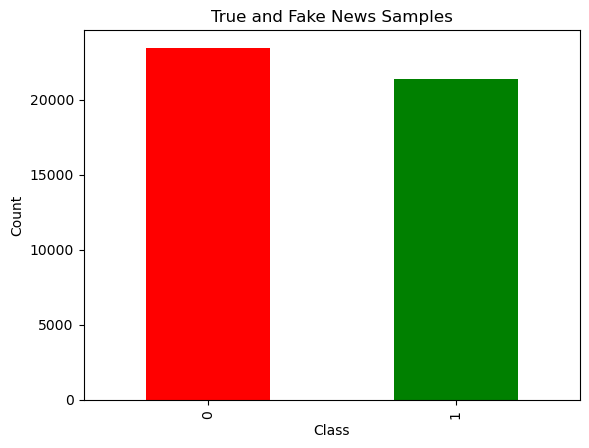

In [54]:
# Example list of colors
colors = ['red', 'green']  # Assign 'green' for true(1), 'red' for fake(0)

script['class'].value_counts().plot.bar(color=colors)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('True and Fake News Samples')
plt.show()

0 = fake and 1 = Real

# Preprocess Text

In [58]:
# Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

import re
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def processWord(script):
    # Lower case
    script = script.lower()
    
    # remove anything with and within brackets
    script = re.sub(r'\[.*?\]', '', script)
    
    # removes any character not a letter, digit, or underscore
    script = re.sub(r'\W', ' ', script)
    
    # removes any Links starting with https
    script = re.sub(r'https?://\S+|www\.\S+', '', script)
    
    # removes anything within and within <>
    script = re.sub(r'<.*?>+', '', script)
    
    # removes any string with % in it
    script = re.sub(r'[%s]' % re.escape(string.punctuation), '', script)
    
    # remove next lines
    script = re.sub(r'\n','', script)
    
    # removes any string that contains at least a digit with zero or more characters
    script = re.sub(r'\w*\d\w*', '', script)
    
    # Remove stopwords (split the script -> filter the stop word -> join the word)
    script = ' '.join([word for word in script.split() if word not in stop_words])
    
    return script


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# apply the function to the text column
script['text'] = script['text'].apply(processWord)

In [61]:
# observing the updated text
script['text'][2]

'gaza reuters israeli troops shot dead least two palestinians wounded live fire friday health ministry gaza said protests intensified washington recognition jerusalem israel capital u n general assembly resolution passed thursday rejecting u president donald trump dec jerusalem declaration little calm palestinian anger reversal decades old u policy contested holy city instead thousands palestinian protesters many throwing rocks confronted israeli security forces along gaza border fence occupied west bank seven cities east jerusalem bethlehem traditional birthplace jesus smoke burning tires billowed street two days christmas celebrations israeli gunfire killed two palestinians confrontation southern gaza strip spokesman palestinian health ministry said putting number wounded half shot live ammunition rest struck rubber bullets hit tear gas canisters statement israeli military said palestinians faced troops gaza border fence said crowd threw stones rolled burning tires soldiers responded

In [62]:
# our predictor variable
X = script['text']

# our target variable
y = script['class']

In [132]:
# train test split the data 
# 60% - Training , 40% - test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

# Data Representation

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score

# TF (Term Frequency): How frequently a word occurs in a document.
# IDF (Inverse Document Frequency): Measures how important a word is in relation to the entire corpus of documents.
# Words that appear in many documents are considered less informative.

# instantiate TfidfVectorizer
# max_df = that words appearing in more than 70% of the documents should be ignored.
vc = TfidfVectorizer(max_df=0.7)

# fit transform our document (X_train)
tfidf_train = vc.fit_transform(X_train) 

# transform our X_test 
# note we dont have to fit the testing set
tfidf_test = vc.transform(X_test)

In [137]:
print(tfidf_train.shape)  # Check the size of the training set
print(tfidf_test.shape)   # Check the size of the test set

(26926, 87433)
(17952, 87433)


In [139]:
# Convert the sparse matrix to a dense array
tfidf_array = tfidf_train.toarray()

# Print the first row (the first document's TF-IDF vector)
print(tfidf_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Logistic Regression

In [141]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression Model 
lr = LogisticRegression(random_state=0)

# fit our model with the outputed tfidf training set
lr.fit(tfidf_train, y_train)

# predict the class on the tfidf testing set
pred_lr = lr.predict(tfidf_test)

# print the predictions
print(pred_lr) 

[0 0 1 ... 1 0 1]


In [146]:
# check the accuracy score on the testing set
import sklearn.metrics
accuracy1 = lr.score(tfidf_test, y_test)
print("Accuracy of Logistic Regression model:", accuracy1)

Accuracy of Logistic Regression model: 0.9850713012477719


In [148]:
# classification report (logistic regression)
from sklearn.metrics import classification_report
print(classification_report(pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9445
           1       0.99      0.98      0.98      8507

    accuracy                           0.99     17952
   macro avg       0.99      0.98      0.99     17952
weighted avg       0.99      0.99      0.99     17952



In [150]:
from sklearn.metrics import confusion_matrix  
cm1 = confusion_matrix(y_test,pred_lr)  
cm1

array([[9319,  142],
       [ 126, 8365]], dtype=int64)

Accuracy: 0.985
Precision: 0.983
Recall: 0.985
F1 Score: 0.984


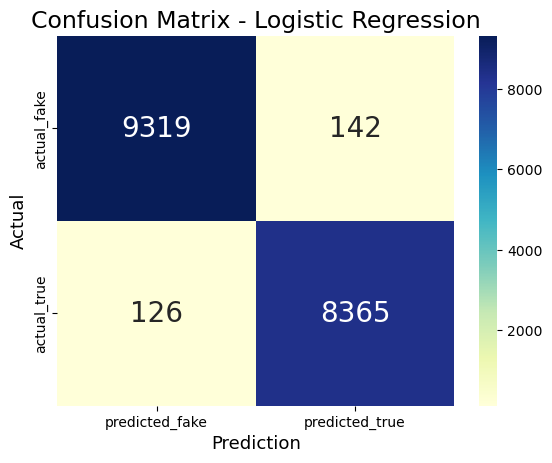

In [152]:
import seaborn as sns

cm = confusion_matrix(y_test, pred_lr)  
sns.heatmap(cm, xticklabels=['predicted_fake', 'predicted_true'], 
                yticklabels=['actual_fake', 'actual_true'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix - Logistic Regression',fontsize=17) 


true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

# accuracy -> measures the proportion of correct predictions (both true positives and true negatives) out of the total number of predictions.
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)

# Precision -> measures the proportion of true positives out of all the predicted positives 
# (i.e., it checks how many of the predicted positive instances were actually positive).
precision = round((true_pos) / (true_pos + false_pos),3)

# Recall measures the proportion of actual positives that were correctly predicted by the model 
# (i.e., how many positive instances were correctly identified).
recall = round((true_pos) / (true_pos + false_neg),3)

# F1 is the harmonic mean of precision and recall, providing a single measure of a model’s performance when you want to balance precision and recall.
f1 = round(2 * (precision * recall) / (precision + recall),3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

# Save the plot as an image
plt.savefig('confusion_matrix_lr.png')
plt.show()

# Naive Bayes

In [155]:
# Use a Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# fit_prior ->  determines whether the model should learn the class prior probabilities from the training data. 
# False -> the classifier will not learn the prior probabilities, and it assumes that all classes are equally likely. 
# True -> it estimates the prior probabilities based on the frequency of each class in the training data.

# alpha -> used for smoothing, specifically Laplace smoothing (or additive smoothing). 
nb = MultinomialNB(alpha=0.1,fit_prior=False)

# Train the model
nb.fit(tfidf_train, y_train)

# Take the model that was trained on the tfidf_train data and apply it to the tfidf_test
pred_nb = nb.predict(tfidf_test)

print(pred_nb)

[0 0 1 ... 1 0 1]


In [157]:
# check the accuracy score on the testing set
import sklearn.metrics
accuracy2 = nb.score(tfidf_test, y_test)
print("Accuracy of Naive Bayes model:", accuracy2)

Accuracy of Naive Bayes model: 0.9396167557932263


In [159]:
# classification report (naive bayes)
from sklearn.metrics import classification_report
print(classification_report(pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9505
           1       0.93      0.94      0.94      8447

    accuracy                           0.94     17952
   macro avg       0.94      0.94      0.94     17952
weighted avg       0.94      0.94      0.94     17952



In [161]:
from sklearn.metrics import confusion_matrix  
cm2 = confusion_matrix(y_test,pred_nb)  
cm2

array([[8941,  520],
       [ 564, 7927]], dtype=int64)

Accuracy: 0.94
Precision: 0.938
Recall: 0.934
F1 Score: 0.936


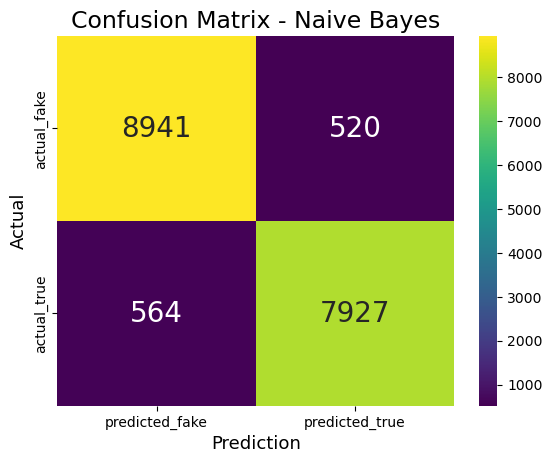

In [163]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_nb) 
sns.heatmap(cm, xticklabels=['predicted_fake', 'predicted_true'], 
                yticklabels=['actual_fake', 'actual_true'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="viridis");

plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix - Naive Bayes',fontsize=17) 


true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

# accuracy -> measures the proportion of correct predictions (both true positives and true negatives) out of the total number of predictions.
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)

# Precision -> measures the proportion of true positives out of all the predicted positives 
# (i.e., it checks how many of the predicted positive instances were actually positive).
precision = round((true_pos) / (true_pos + false_pos),3)

# Recall measures the proportion of actual positives that were correctly predicted by the model 
# (i.e., how many positive instances were correctly identified).
recall = round((true_pos) / (true_pos + false_neg),3)

# F1 is the harmonic mean of precision and recall, providing a single measure of a model’s performance when you want to balance precision and recall.
f1 = round(2 * (precision * recall) / (precision + recall),3)


print('Accuracy: {}'.format(accuracy)) 
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

# Save the plot as an image
plt.savefig('confusion_matrix_nb.png')
plt.show()

#  Random Forest Classifier

In [166]:
# import Random Forest Classifier from sklearn 
from sklearn.ensemble import RandomForestClassifier

# instantiate our model 
rf = RandomForestClassifier(random_state = 0, n_estimators= 150) 
# n_estimators: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model 
# but also increases the computational cost of training and predicting

# train our model on training data
rf.fit(tfidf_train,y_train)

# get predictions using random forest classifier
pred_rf = rf.predict(tfidf_test)
print(pred_rf)

[0 0 1 ... 1 0 1]


In [167]:
# check the accuracy score on the testing set
import sklearn.metrics
accuracy3 = rf.score(tfidf_test, y_test)
print("Accuracy of Random Forest Classifier model:", accuracy3)

Accuracy of Random Forest Classifier model: 0.9904188948306596


In [108]:
# classification report (random forest classifier)
from sklearn.metrics import classification_report
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9415
           1       0.99      0.99      0.99      8537

    accuracy                           0.99     17952
   macro avg       0.99      0.99      0.99     17952
weighted avg       0.99      0.99      0.99     17952



In [110]:
from sklearn.metrics import confusion_matrix  
cm3 = confusion_matrix(y_test,pred_rf)  
cm3

array([[9352,  109],
       [  63, 8428]], dtype=int64)

Accuracy: 0.99
Precision: 0.987
Recall: 0.993
F1 Score: 0.99


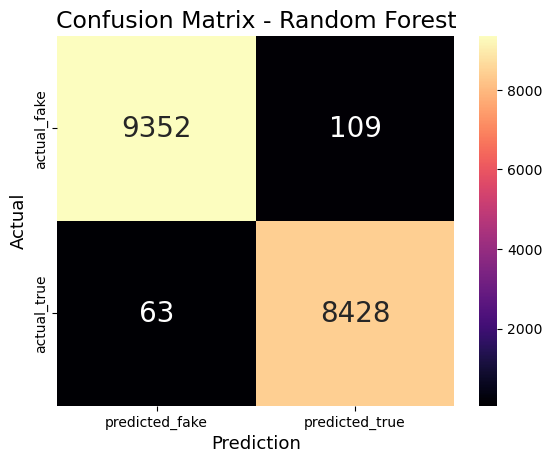

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_rf) 
sns.heatmap(cm, xticklabels=['predicted_fake', 'predicted_true'], 
                yticklabels=['actual_fake', 'actual_true'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="magma");

plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix - Random Forest',fontsize=17) 


true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

# accuracy -> measures the proportion of correct predictions (both true positives and true negatives) out of the total number of predictions.
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)

# Precision -> measures the proportion of true positives out of all the predicted positives 
# (i.e., it checks how many of the predicted positive instances were actually positive).
precision = round((true_pos) / (true_pos + false_pos),3)

# Recall measures the proportion of actual positives that were correctly predicted by the model 
# (i.e., how many positive instances were correctly identified).
recall = round((true_pos) / (true_pos + false_neg),3)

# F1 is the harmonic mean of precision and recall, providing a single measure of a model’s performance when you want to balance precision and recall.
f1 = round(2 * (precision * recall) / (precision + recall),3)


print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

# Save the plot as an image
plt.savefig('confusion_matrix_rfc.png')
plt.show()

# Compare Models

In [115]:
#creating accuracy dataframe
accuaracy_list=pd.DataFrame({'Models':['Logistic Regression','Naive Bayes','Random Forest'],
                            'Accuracy':[accuracy1*100,accuracy2*100,
                                        accuracy3*100]})

In [117]:
print(accuaracy_list)

                Models   Accuracy
0  Logistic Regression  98.507130
1          Naive Bayes  93.961676
2        Random Forest  99.041889


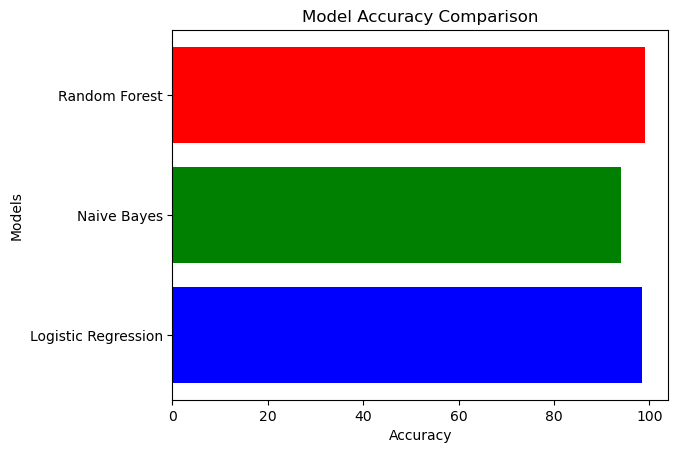

In [119]:
# Example list of colors
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot with different colors for each bar
plt.barh(accuaracy_list['Models'], accuaracy_list['Accuracy'], color=colors)

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')
plt.show()

In [121]:
import joblib
joblib.dump(vc, 'tfidfVectorizer.joblib')

['tfidfVectorizer.joblib']

In [123]:
joblib.dump(rf, 'random_forest_classifier.joblib')

['random_forest_classifier.joblib']

# Manual Testing

In [126]:
# function to to check the predicted class and return a string whether its a fake or true news
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not Really Fake News , possible is true news"

# functions that gets a input of news(text) and does the same steps as above
# we get the news and put into a dataframe 
# we get the news text and clean it 
# we get the clean text and tfidf the text
# predict the news using the models we used
def manual_test(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(processWord)
    new_x_test = new_def_test['text']
    new_tfidf_test = vc.transform(new_x_test)
    pred_lr = lr.predict(new_tfidf_test)
    pred_nb = nb.predict(new_tfidf_test)
    pred_rf = rf.predict(new_tfidf_test)
    
    return print("\n\n Logistic Regression Prediction: {} \n Naive Bayes Prediction: {} \n Random Forest Prediction: {}".format(
        output_label(pred_lr[0]), 
        output_label(pred_nb[0]), 
        output_label(pred_rf[0])))        


In [128]:
# observe an example of fake news that we reserved in the beginning
fakeData_manual_testing['text'].values[2]

'Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, 

In [130]:
# observe an example of true news that we reserved in the beginning
trueData_manual_testing['text'].values[6]

'LONDON (Reuters) - LexisNexis, a provider of legal, regulatory and business information, said on Tuesday it had withdrawn two products from the Chinese market in March this year after it was asked to remove some content.  The issue of academic freedom in China hit the headlines this week after the leading British academic publisher,  Cambridge University Press, said it had complied with a request to block online access to some scholarly articles in China.  It later reversed its position.   Earlier this year LexisNexis Business Insight Solutions in China was asked to remove some content from its database,  LexisNexis said in a statement.  In March 2017, the company withdrew two products (Nexis and LexisNexis Academic) from the Chinese market.  LexisNexis is owned by information group Relx. '

In [ ]:
# make the user put an input of news 
news = str(input())
# gets the users input and checks if the news is fake or real
manual_test(news)